# Contents:
This code contains the original dataset that is encoded and nomalized. Later on in this notebook, the dataset is also split into seperate training sets. 

In [252]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
import matplotlib.pyplot as plt

In [247]:
df = pd.read_csv("../Data_CSVs/Official_Salary.csv")

In [231]:
df

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,9/9/2018 11:52,Google,T4,Software Engineer,327000,"Seattle, WA",10.0,1.0,Distributed Systems (Back-End),155000,...,0,0,0,0,0,0,0,0,NaN,NaN
62638,9/13/2018 8:23,Microsoft,62,Software Engineer,237000,"Redmond, WA",2.0,2.0,Full Stack,146900,...,0,0,0,0,0,0,0,0,NaN,NaN
62639,9/13/2018 14:35,MSFT,63,Software Engineer,220000,"Seattle, WA",14.0,12.0,Full Stack,157000,...,0,0,0,0,0,0,0,0,NaN,NaN
62640,9/16/2018 16:10,Salesforce,Lead MTS,Software Engineer,280000,"San Francisco, CA",8.0,4.0,iOS,194688,...,0,0,0,0,0,0,0,0,NaN,NaN


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  int64  
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

In [233]:
df.isnull().sum()

timestamp                      0
company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22505
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
dtype: int64

In [234]:
df.dropna(inplace=True)

In [235]:
df = df.drop(columns = ['timestamp'])

In [236]:
df

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
15710,Google,L6,Software Engineer,400000,"Sunnyvale, CA",5.0,5.0,Distributed Systems (Back-End),210000,145000.0,...,1,0,0,1,0,0,0,0,Asian,PhD
23532,Microsoft,61,Software Engineer,136000,"Redmond, WA",3.0,2.0,DevOps,124000,1000.0,...,0,0,0,0,0,1,0,0,Two Or More,Bachelor's Degree
23533,Google,L5,Software Engineer,337000,"San Bruno, CA",6.0,6.0,Full Stack,177000,125000.0,...,0,0,0,1,0,0,0,0,Asian,Bachelor's Degree
23534,Microsoft,62,Software Engineer,222000,"Seattle, WA",4.0,4.0,API Development (Back-End),164000,38000.0,...,0,0,0,1,0,0,0,0,Asian,Master's Degree
23535,Blend,IC3,Software Engineer,187000,"San Francisco, CA",5.0,0.0,Full Stack,165000,22000.0,...,0,0,0,0,1,0,0,0,White,Bachelor's Degree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61981,Facebook,M2,Software Engineering Manager,1470000,"Menlo Park, CA",9.0,7.0,Full Stack,290000,1100.0,...,0,0,0,1,0,0,0,0,Asian,Bachelor's Degree
61982,Google,L10,Product Manager,4500000,"San Francisco, CA",20.0,14.0,Consumer,450000,3700.0,...,0,0,0,1,0,0,0,0,Asian,Master's Degree
61984,Zapier,L8,Software Engineering Manager,1605000,"Denver, CO",16.0,2.0,Full Stack,250000,1305.0,...,0,0,0,0,1,0,0,0,White,Master's Degree
61987,Facebook,D1,Software Engineering Manager,2372000,"Menlo Park, CA",22.0,2.0,ML / AI,315000,1933.0,...,0,0,0,0,0,0,1,0,Black,Master's Degree


# Encoding Data

In [237]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
# encode categorical columns with LabelEncoder
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [238]:
df.columns

Index(['company', 'level', 'title', 'totalyearlycompensation', 'location',
       'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

In [239]:
scaler = StandardScaler()
scaler.fit(df)
scale_data=scaler.transform(df)

In [240]:
df_new_scale = pd.DataFrame(scale_data)

In [243]:
df_new_scale.columns = ['company', 'level', 'title', 'totalyearlycompensation', 'location',
       'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education']

In [244]:
df_new_scale

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,-0.143430,0.054564,0.447007,1.517822,1.065329,-0.363612,0.689104,-0.533509,1.329823,1.379429,...,4.726695,-0.118899,-0.126508,0.943906,-0.742863,-0.191721,-0.178149,-0.227948,-0.887996,1.754538
1,0.471923,-1.595458,0.447007,-0.465347,0.569680,-0.705530,-0.212300,-0.611236,-0.172942,-0.606353,...,-0.211564,-0.118899,-0.126508,-1.059427,-0.742863,5.215915,-0.178149,-0.227948,0.718519,-0.941343
2,-0.143430,0.009894,0.447007,1.044566,0.754969,-0.192653,0.989572,-0.241446,0.753181,1.103626,...,-0.211564,-0.118899,-0.126508,0.943906,-0.742863,-0.191721,-0.178149,-0.227948,-0.887996,-0.941343
3,0.471923,-1.592666,0.447007,0.180685,0.880039,-0.534571,0.388636,-1.482715,0.526019,-0.096117,...,-0.211564,-0.118899,-0.126508,0.943906,-0.742863,-0.191721,-0.178149,-0.227948,-0.887996,0.855911
4,-1.064986,-0.336304,0.447007,-0.082235,0.768866,-0.363612,-0.813236,-0.241446,0.543493,-0.316760,...,-0.211564,-0.118899,-0.126508,-1.059427,1.346143,-0.191721,-0.178149,-0.227948,1.254024,-0.941343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21516,-0.370138,0.272334,0.746790,9.555667,-0.055671,0.320223,1.290039,-0.241446,2.727743,-0.604974,...,-0.211564,-0.118899,-0.126508,0.943906,-0.742863,-0.191721,-0.178149,-0.227948,-0.887996,-0.941343
21517,-0.143430,-0.079448,-0.452342,32.317043,0.768866,2.200769,3.393315,-0.900944,5.523583,-0.569119,...,-0.211564,-0.118899,-0.126508,0.943906,-0.742863,-0.191721,-0.178149,-0.227948,-0.887996,0.855911
21518,1.841008,0.107611,0.746790,10.569788,-1.153509,1.516934,-0.212300,-0.241446,2.028783,-0.602147,...,-0.211564,-0.118899,-0.126508,-1.059427,1.346143,-0.191721,-0.178149,-0.227948,1.254024,0.855911
21519,-0.370138,-1.017532,0.746790,16.331496,-0.055671,2.542687,-0.212300,0.222558,3.164593,-0.593486,...,-0.211564,-0.118899,-0.126508,-1.059427,-0.742863,-0.191721,5.613293,-0.227948,-0.352491,0.855911


In [246]:
df_new_scale.to_csv('Real_Data.csv', index = False)

# Split encoded and normalized data into training and testing sets

In [133]:
target = 'totalyearlycompensation'
y = df[target]
X = df #.drop(columns=[target])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1066)
X_train.dtypes

company                     object
level                       object
title                       object
totalyearlycompensation      int64
location                    object
yearsofexperience          float64
yearsatcompany             float64
tag                         object
basesalary                   int64
stockgrantvalue            float64
bonus                      float64
gender                      object
otherdetails                object
cityid                       int64
dmaid                      float64
rowNumber                    int64
Masters_Degree               int64
Bachelors_Degree             int64
Doctorate_Degree             int64
Highschool                   int64
Some_College                 int64
Race_Asian                   int64
Race_White                   int64
Race_Two_Or_More             int64
Race_Black                   int64
Race_Hispanic                int64
Race                        object
Education                   object
dtype: object

In [134]:
X = df.drop(columns=[target])

In [135]:
encoder = ce.LeaveOneOutEncoder(return_df=True)
X_train_loo = encoder.fit_transform(X_train, y_train)
X_test_loo = encoder.transform(X_test)
X_train_loo.shape

(17216, 28)

In [136]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_loo, y_train)
X_train_scaled.shape

(17216, 28)

In [137]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,-0.045548,-0.759836,-0.321796,-0.531203,-0.753857,0.493300,-0.513635,-1.715145,-0.593020,-0.445377,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.608246,0.617166
1,-0.045545,0.500659,1.203586,0.693643,0.340188,1.177309,0.393344,0.908085,1.138245,0.328726,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.610736,0.616281
2,-0.782808,0.226649,0.940086,0.019203,-0.298203,1.861317,3.718931,1.570660,0.666082,-0.487601,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.609365,0.616768
3,-1.000090,-1.049739,-0.321878,-0.290885,0.370300,0.151296,-0.513635,-0.522242,0.193919,-0.628347,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.608734,-0.804618
4,0.270870,0.369506,-0.321660,-0.926565,-1.884482,-0.361711,-0.211309,0.706508,-1.677246,-0.065363,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.607442,-0.804235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17211,0.485892,0.392444,-0.322065,0.251768,1.013505,-0.874717,-0.211309,0.704689,0.456232,0.019085,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.609837,0.616600
17212,0.617358,-0.537230,-0.321524,-1.321927,-2.226499,-1.045720,-0.513635,1.797509,-1.957046,-0.515750,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.606638,0.617737
17213,-0.942768,0.060855,-0.321711,-0.779273,-0.243099,-0.532713,0.393344,-0.521554,-0.872820,-0.628347,...,-0.211779,-0.119153,-0.126936,-1.057777,1.343437,-0.192635,-0.178569,-0.226483,1.162428,-0.804324
17214,0.933828,0.367094,-0.322402,1.236297,1.295946,-0.361711,-0.815961,-0.353475,1.103270,0.919859,...,-0.211779,-0.119153,-0.126936,-1.057777,-0.744360,-0.192635,-0.178569,4.415341,-0.740163,-0.805537


In [138]:
X_train_scaled_df.describe()

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
count,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,...,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04
mean,2.362835e-17,8.068721e-17,-1.328966e-16,-3.353369e-17,4.969177e-16,7.924268e-17,1.836614e-17,-3.452422e-16,-5.695568e-17,-3.797045e-17,...,4.952668e-18,6.067018e-17,-3.136690e-17,6.954371e-17,4.426447e-17,5.406662e-17,3.054145e-17,3.616479e-17,-5.641914e-16,-1.675653e-16
std,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,...,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00
min,-2.616921e+00,-2.366625e+00,-2.053039e+00,-1.453714e+00,-2.646574e+00,-1.216722e+00,-8.159609e-01,-5.928439e+00,-2.271822e+00,-6.283467e-01,...,-2.117791e-01,-1.191526e-01,-1.269364e-01,-1.057777e+00,-7.443595e-01,-1.926355e-01,-1.785689e-01,-2.264831e-01,-3.097217e+00,-8.119568e-01
25%,-7.719174e-01,-5.768158e-01,-3.220379e-01,-6.164772e-01,-6.834821e-01,-7.037153e-01,-8.159609e-01,-7.436200e-01,-5.930195e-01,-6.283467e-01,...,-2.117791e-01,-1.191526e-01,-1.269364e-01,-1.057777e+00,-7.443595e-01,-1.926355e-01,-1.785689e-01,-2.264831e-01,-6.096640e-01,-8.046039e-01
50%,-4.394421e-02,-1.813019e-01,-3.217985e-01,-1.823544e-01,3.396775e-01,-1.907087e-01,-2.113087e-01,-2.256560e-02,1.904368e-02,-3.468547e-01,...,-2.117791e-01,-1.191526e-01,-1.269364e-01,9.453788e-01,-7.443595e-01,-1.926355e-01,-1.785689e-01,-2.264831e-01,-6.077888e-01,-8.039508e-01
75%,4.876300e-01,3.693162e-01,-2.897039e-02,3.680513e-01,6.691931e-01,4.933000e-01,3.933436e-01,7.045936e-01,5.436693e-01,1.598309e-01,...,-2.117791e-01,-1.191526e-01,-1.269364e-01,9.453788e-01,1.343437e+00,-1.926355e-01,-1.785689e-01,-2.264831e-01,1.159300e+00,6.168520e-01
max,1.267700e+01,1.139744e+01,3.760937e+00,3.707468e+01,7.854500e+00,6.478376e+00,1.127708e+01,1.374476e+01,1.339700e+01,1.279882e+01,...,4.721901e+00,8.392597e+00,7.877961e+00,9.453788e-01,1.343437e+00,5.191151e+00,5.600081e+00,4.415341e+00,1.164389e+00,3.444094e+00


In [147]:
X_test_scaled = scaler.transform(X_test_loo)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)
X_test_scaled_df


,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,-0.240131,-1.030103,-0.321949,-0.058319,-0.245486,-1.216722,-0.815961,0.096080,-0.243269,-0.065363,...,-0.211779,-0.119153,-0.126936,-1.057777,-0.744360,-0.192635,5.600081,-0.226483,-2.942643,-0.804701
1,-0.733273,-0.633257,-0.321949,-0.887804,-0.017478,-0.361711,0.695670,-0.345440,-1.012720,-0.628347,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.609259,0.616697
2,-0.163603,1.595756,0.340632,0.577360,0.528209,1.690315,2.207300,0.661833,0.543669,0.525771,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.609259,0.616697
3,-1.134903,-0.181501,-0.321949,-0.942069,-0.674020,-1.216722,-0.815961,-0.772836,-1.012720,-0.628347,...,-0.211779,-0.119153,-0.126936,-1.057777,1.343437,-0.192635,-0.178569,-0.226483,1.159893,-0.804701
4,-0.682587,-0.181501,-0.321949,-0.368407,0.232071,-0.532713,0.393344,0.704805,0.019044,-0.628347,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.609259,-0.804701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4300,1.038966,0.109982,-0.321949,0.197503,1.193007,-0.874717,-0.211309,-0.022566,0.281356,0.230204,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.609259,0.616697
4301,-0.920588,-1.168249,-0.321949,-0.918813,-0.887131,-0.874717,-0.211309,-0.022566,-0.960257,-0.628347,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.609259,-0.804701
4302,-0.128182,0.413470,-0.321949,-0.267629,-0.887131,-0.361711,-0.815961,0.704805,0.106481,-0.501675,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.609259,0.616697
4303,-0.999936,-0.988522,-0.321949,0.026955,0.178605,1.348311,2.207300,0.704805,0.263869,-0.206109,...,-0.211779,-0.119153,7.877961,-1.057777,1.343437,-0.192635,-0.178569,-0.226483,1.159893,0.462117


In [148]:
X_test_scaled_df

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,-0.240131,-1.030103,-0.321949,-0.058319,-0.245486,-1.216722,-0.815961,0.096080,-0.243269,-0.065363,...,-0.211779,-0.119153,-0.126936,-1.057777,-0.744360,-0.192635,5.600081,-0.226483,-2.942643,-0.804701
1,-0.733273,-0.633257,-0.321949,-0.887804,-0.017478,-0.361711,0.695670,-0.345440,-1.012720,-0.628347,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.609259,0.616697
2,-0.163603,1.595756,0.340632,0.577360,0.528209,1.690315,2.207300,0.661833,0.543669,0.525771,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.609259,0.616697
3,-1.134903,-0.181501,-0.321949,-0.942069,-0.674020,-1.216722,-0.815961,-0.772836,-1.012720,-0.628347,...,-0.211779,-0.119153,-0.126936,-1.057777,1.343437,-0.192635,-0.178569,-0.226483,1.159893,-0.804701
4,-0.682587,-0.181501,-0.321949,-0.368407,0.232071,-0.532713,0.393344,0.704805,0.019044,-0.628347,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.609259,-0.804701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4300,1.038966,0.109982,-0.321949,0.197503,1.193007,-0.874717,-0.211309,-0.022566,0.281356,0.230204,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.609259,0.616697
4301,-0.920588,-1.168249,-0.321949,-0.918813,-0.887131,-0.874717,-0.211309,-0.022566,-0.960257,-0.628347,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.609259,-0.804701
4302,-0.128182,0.413470,-0.321949,-0.267629,-0.887131,-0.361711,-0.815961,0.704805,0.106481,-0.501675,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.609259,0.616697
4303,-0.999936,-0.988522,-0.321949,0.026955,0.178605,1.348311,2.207300,0.704805,0.263869,-0.206109,...,-0.211779,-0.119153,7.877961,-1.057777,1.343437,-0.192635,-0.178569,-0.226483,1.159893,0.462117


In [150]:
y = X_test_scaled_df['totalyearlycompensation']
X_test_scaled_df = X_test_scaled_df.drop(columns = ['totalyearlycompensation'])
X_test_scaled_df

,company,level,title,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,-0.240131,-1.030103,-0.321949,-0.245486,-1.216722,-0.815961,0.096080,-0.243269,-0.065363,0.466359,...,-0.211779,-0.119153,-0.126936,-1.057777,-0.744360,-0.192635,5.600081,-0.226483,-2.942643,-0.804701
1,-0.733273,-0.633257,-0.321949,-0.017478,-0.361711,0.695670,-0.345440,-1.012720,-0.628347,-0.460545,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.609259,0.616697
2,-0.163603,1.595756,0.340632,0.528209,1.690315,2.207300,0.661833,0.543669,0.525771,0.264858,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.609259,0.616697
3,-1.134903,-0.181501,-0.321949,-0.674020,-1.216722,-0.815961,-0.772836,-1.012720,-0.628347,-0.662046,...,-0.211779,-0.119153,-0.126936,-1.057777,1.343437,-0.192635,-0.178569,-0.226483,1.159893,-0.804701
4,-0.682587,-0.181501,-0.321949,0.232071,-0.532713,0.393344,0.704805,0.019044,-0.628347,-0.178443,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.609259,-0.804701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4300,1.038966,0.109982,-0.321949,1.193007,-0.874717,-0.211309,-0.022566,0.281356,0.230204,-0.299344,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.609259,0.616697
4301,-0.920588,-1.168249,-0.321949,-0.887131,-0.874717,-0.211309,-0.022566,-0.960257,-0.628347,-0.742646,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.609259,-0.804701
4302,-0.128182,0.413470,-0.321949,-0.887131,-0.361711,-0.815961,0.704805,0.106481,-0.501675,-0.178443,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.609259,0.616697
4303,-0.999936,-0.988522,-0.321949,0.178605,1.348311,2.207300,0.704805,0.263869,-0.206109,0.143958,...,-0.211779,-0.119153,7.877961,-1.057777,1.343437,-0.192635,-0.178569,-0.226483,1.159893,0.462117


# Random Forest Regressor to analyze scaled data

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished


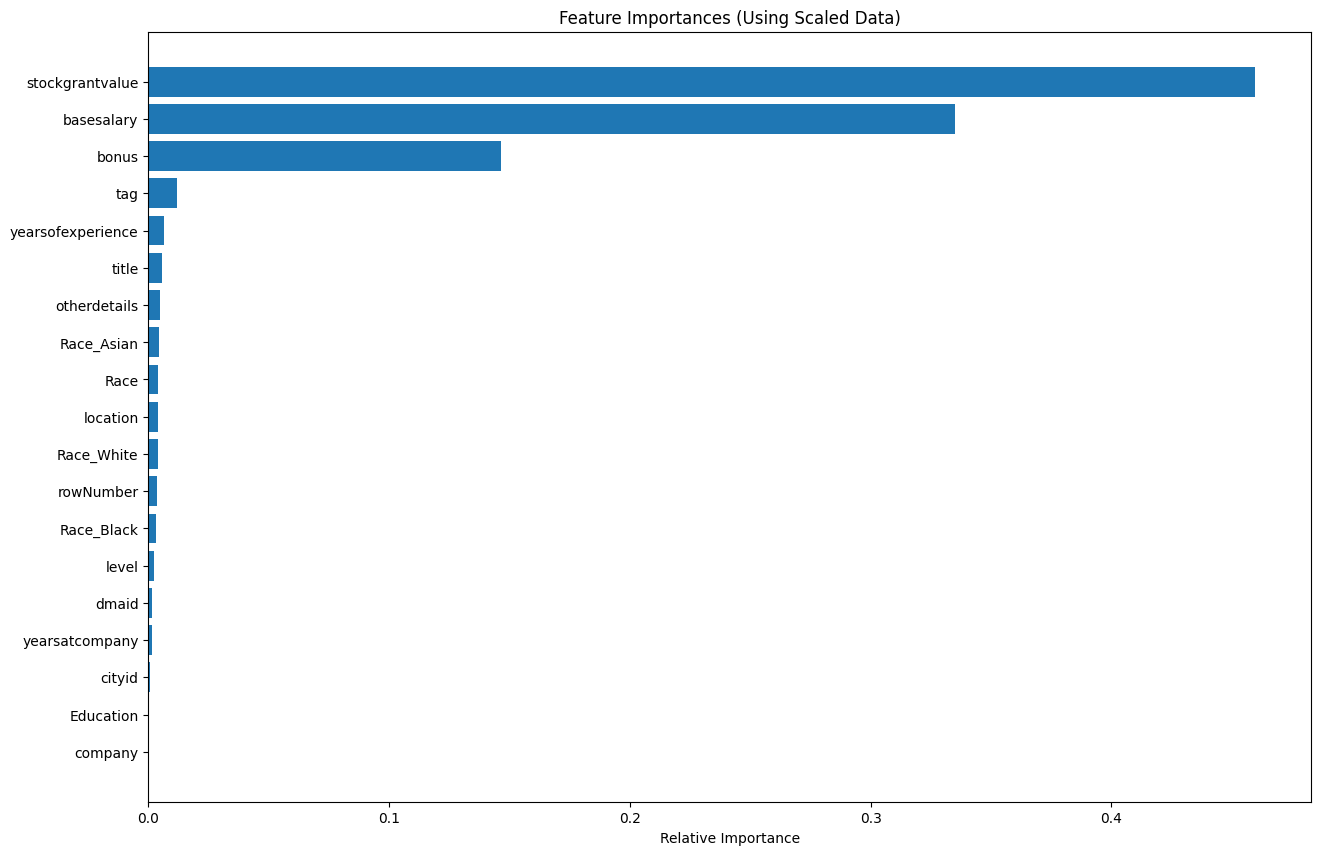

In [163]:
from sklearn.ensemble import RandomForestRegressor
#%%time
df_scaled = X_test_scaled_df
model = RandomForestRegressor(random_state=1, max_depth=5, verbose=3)
model.fit(df_scaled,y)

features = df_scaled.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-19:]  # top 15 features
plt.figure(figsize=(15,10))
plt.title('Feature Importances (Using Scaled Data)')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [164]:
df_scaled ,y

(       company     level     title  location  yearsofexperience  \
 0    -0.240131 -1.030103 -0.321949 -0.245486          -1.216722   
 1    -0.733273 -0.633257 -0.321949 -0.017478          -0.361711   
 2    -0.163603  1.595756  0.340632  0.528209           1.690315   
 3    -1.134903 -0.181501 -0.321949 -0.674020          -1.216722   
 4    -0.682587 -0.181501 -0.321949  0.232071          -0.532713   
 ...        ...       ...       ...       ...                ...   
 4300  1.038966  0.109982 -0.321949  1.193007          -0.874717   
 4301 -0.920588 -1.168249 -0.321949 -0.887131          -0.874717   
 4302 -0.128182  0.413470 -0.321949 -0.887131          -0.361711   
 4303 -0.999936 -0.988522 -0.321949  0.178605           1.348311   
 4304  1.894951  3.440870  1.204799  1.013097           0.151296   
 
       yearsatcompany       tag  basesalary  stockgrantvalue     bonus  ...  \
 0          -0.815961  0.096080   -0.243269        -0.065363  0.466359  ...   
 1           0.695670 -0

In [165]:
df.to_csv('Official_Salary_Normalized.csv', index = False)

In [166]:
X_train_scaled_df.to_csv('Salary_Train_Set.csv', index = False)

In [167]:
X_test_scaled_df.to_csv('Salary_Test_Set.csv', index = False)

In [169]:
df_scaled

,company,level,title,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,-0.240131,-1.030103,-0.321949,-0.245486,-1.216722,-0.815961,0.096080,-0.243269,-0.065363,0.466359,...,-0.211779,-0.119153,-0.126936,-1.057777,-0.744360,-0.192635,5.600081,-0.226483,-2.942643,-0.804701
1,-0.733273,-0.633257,-0.321949,-0.017478,-0.361711,0.695670,-0.345440,-1.012720,-0.628347,-0.460545,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.609259,0.616697
2,-0.163603,1.595756,0.340632,0.528209,1.690315,2.207300,0.661833,0.543669,0.525771,0.264858,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.609259,0.616697
3,-1.134903,-0.181501,-0.321949,-0.674020,-1.216722,-0.815961,-0.772836,-1.012720,-0.628347,-0.662046,...,-0.211779,-0.119153,-0.126936,-1.057777,1.343437,-0.192635,-0.178569,-0.226483,1.159893,-0.804701
4,-0.682587,-0.181501,-0.321949,0.232071,-0.532713,0.393344,0.704805,0.019044,-0.628347,-0.178443,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.609259,-0.804701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4300,1.038966,0.109982,-0.321949,1.193007,-0.874717,-0.211309,-0.022566,0.281356,0.230204,-0.299344,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.609259,0.616697
4301,-0.920588,-1.168249,-0.321949,-0.887131,-0.874717,-0.211309,-0.022566,-0.960257,-0.628347,-0.742646,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.609259,-0.804701
4302,-0.128182,0.413470,-0.321949,-0.887131,-0.361711,-0.815961,0.704805,0.106481,-0.501675,-0.178443,...,-0.211779,-0.119153,-0.126936,0.945379,-0.744360,-0.192635,-0.178569,-0.226483,-0.609259,0.616697
4303,-0.999936,-0.988522,-0.321949,0.178605,1.348311,2.207300,0.704805,0.263869,-0.206109,0.143958,...,-0.211779,-0.119153,7.877961,-1.057777,1.343437,-0.192635,-0.178569,-0.226483,1.159893,0.462117


# Using the csv from "The Data Set" to analyze the scalled data

In [253]:
df_new = pd.read_csv("../Data_CSVs/Cleaned_Official_Data.csv")

In [254]:
df_new

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Education_Level,Race
0,GE Digital,Software Engineer,140000,"San Ramon, CA",4.0,4.0,130000,0.0,10000.0,Male,No Education,NaN
1,Amazon,Software Engineer,172000,"Seattle, WA",12.0,2.0,142000,30000.0,0.0,Male,No Education,NaN
2,Uber,Software Engineer,325000,"San Francisco, CA",7.0,2.0,161000,140000.0,25000.0,Male,No Education,NaN
3,Microsoft,Software Engineer,150000,"Seattle, WA",4.0,0.0,118000,5000.0,12000.0,Male,No Education,NaN
4,Google,Software Engineer,640000,"Mountain View, CA",11.0,4.0,210000,380000.0,50000.0,Male,No Education,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
41499,Amazon,Software Engineer,135000,"Seattle, WA",1.0,0.0,104000,3000.0,18500.0,Male,No Education,NaN
41500,Amazon,Software Engineer,350000,"Austin, TX",14.0,1.0,160000,175000.0,56250.0,Male,No Education,NaN
41501,Microsoft,Product Manager,305000,"Seattle, WA",20.0,2.0,200000,75000.0,30000.0,Female,No Education,NaN
41502,Amazon,Software Engineer,152000,"Seattle, WA",3.0,0.0,106000,26000.0,20000.0,Male,No Education,NaN


In [103]:
target = 'totalyearlycompensation'
y = df_new[target]
X = df_new #.drop(columns=[target])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1066)
X_train.dtypes

company                     object
title                       object
totalyearlycompensation      int64
location                    object
yearsofexperience          float64
yearsatcompany             float64
basesalary                   int64
stockgrantvalue            float64
bonus                      float64
gender                      object
Education_Level             object
Race                        object
dtype: object

In [104]:
X = df_new.drop(columns=[target])

In [105]:
encoder = ce.LeaveOneOutEncoder(return_df=True)
X_train_loo = encoder.fit_transform(X_train, y_train)
X_test_loo = encoder.transform(X_test)
X_train_loo.shape

(33203, 12)

In [106]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_loo, y_train)
X_train_scaled.shape

(33203, 12)

In [107]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Education_Level,Race
0,-2.312761,-0.273638,-1.431165,-0.011889,-0.864764,-0.511021,-2.067676,-0.670278,-0.765003,0.390203,-1.309790,-0.350795
1,-1.183082,-1.678823,-0.981434,-0.686576,-1.212470,-0.820772,-1.055600,-0.670278,-0.603406,0.389880,-1.310029,-1.183502
2,-0.064071,-0.273828,-0.289540,0.657420,-0.169352,0.418232,0.125154,-0.560154,-0.078216,0.389384,0.459816,0.995425
3,0.008564,-0.273801,-0.453865,1.068720,-1.212470,-0.820772,-0.338714,-0.243545,-0.765003,0.389502,0.459889,0.995520
4,0.245371,-0.273987,0.661815,0.621887,0.873765,-0.820772,0.399258,1.050419,-0.765003,0.388701,0.459392,0.994870
...,...,...,...,...,...,...,...,...,...,...,...,...
33198,-0.011471,-0.273851,-0.151161,1.083635,-0.864764,-0.511021,0.082984,-0.326139,0.083381,0.389284,0.459754,0.995344
33199,-0.009258,-0.273825,-0.306837,-1.550005,0.352207,-0.201270,-0.591733,0.155656,-0.765003,0.389396,-1.310388,-0.352412
33200,1.021037,1.102445,-0.514405,0.347329,0.004501,-0.820772,0.167324,-0.670278,-0.765003,-2.167608,0.326356,-2.344925
33201,2.348074,-0.274007,0.782896,-1.012355,0.873765,-0.511021,-0.085695,1.284433,0.042981,0.388614,0.459338,0.994800


In [108]:
X_train_scaled_df.describe()

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Education_Level,Race
count,3.320300e+04,3.320300e+04,3.320300e+04,3.320300e+04,3.320300e+04,3.320300e+04,3.320300e+04,3.320300e+04,3.320300e+04,3.320300e+04,3.320300e+04,3.320300e+04
mean,-1.957561e-16,8.089183e-17,1.669197e-17,5.545799e-16,-2.567995e-17,3.220693e-17,-2.983154e-16,-2.567995e-17,8.121283e-17,3.740177e-16,1.069730e-16,1.607137e-16
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-2.920247e+00,-2.531772e+00,-1.673328e+00,-3.014264e+00,-1.212470e+00,-8.207719e-01,-2.784562e+00,-6.702782e-01,-7.650026e-01,-2.213754e+00,-1.373021e+00,-2.412093e+00
25%,-7.414386e-01,-2.739364e-01,-6.354868e-01,-6.136360e-01,-6.909110e-01,-8.207719e-01,-5.495628e-01,-6.565126e-01,-6.438050e-01,3.882786e-01,-1.309951e+00,-1.183477e+00
50%,-4.348426e-03,-2.738080e-01,-1.944042e-01,2.735147e-01,-3.432051e-01,-2.012697e-01,8.298419e-02,-3.261388e-01,-1.590146e-01,3.891664e-01,3.262588e-01,-3.512798e-01
75%,4.557469e-01,-2.736219e-01,4.023545e-01,6.223928e-01,5.260596e-01,4.182324e-01,6.101067e-01,1.969530e-01,2.853765e-01,3.895700e-01,4.596231e-01,9.952734e-01
max,1.357730e+01,3.693861e+00,1.380780e+01,3.518781e+00,6.610912e+00,1.156927e+01,2.655342e+00,2.686087e+01,3.963419e+01,3.631452e+00,3.291750e+00,9.962309e-01


In [109]:
X_test_scaled = scaler.transform(X_test_loo)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)
X_test_scaled_df

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Education_Level,Race
0,0.001220,0.046406,-0.064674,1.068142,-0.169352,-0.511021,0.209494,0.018001,-0.765003,-2.169085,0.459646,0.995192
1,-0.673106,-0.273864,-0.376026,-0.772248,0.352207,-0.511021,0.504682,-0.670278,-0.765003,0.389162,0.459646,0.995192
2,1.767495,3.687885,2.651011,1.924893,2.264589,1.347486,1.917371,2.537101,1.254957,0.389162,0.162612,-0.352798
3,-0.526663,-0.358968,-0.462513,1.068142,-0.864764,-0.201270,0.293833,-0.670278,-0.765003,0.389162,0.326085,-1.184330
4,-0.044051,-0.273864,-0.358729,-0.579807,-0.690911,-0.511021,-0.929091,0.293312,-0.765003,0.389162,0.326085,-1.184330
...,...,...,...,...,...,...,...,...,...,...,...,...
8296,0.967090,-0.273864,0.186138,1.082426,1.221471,-0.511021,0.188409,0.155656,0.042981,0.389162,0.459646,0.995192
8297,-0.124507,-0.273864,0.471544,0.196659,1.569177,0.727983,1.348078,0.128125,-0.765003,0.389162,0.459646,0.995192
8298,-0.178230,-0.273864,-0.557649,0.969769,-1.212470,-0.820772,-0.444138,-0.670278,0.204578,0.389162,-1.310413,-1.184330
8299,-0.231465,-0.273864,0.056407,-0.215251,0.352207,1.347486,0.399258,-0.119655,-0.159015,0.389162,0.459646,0.995192


In [120]:
y = X_test_scaled_df['totalyearlycompensation']
X_test_scaled_df = X_test_scaled_df.drop(columns=['totalyearlycompensation'])


In [121]:
y

0      -0.064674
1      -0.376026
2       2.651011
3      -0.462513
4      -0.358729
          ...   
8296    0.186138
8297    0.471544
8298   -0.557649
8299    0.056407
8300    2.071549
Name: totalyearlycompensation, Length: 8301, dtype: float64

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished


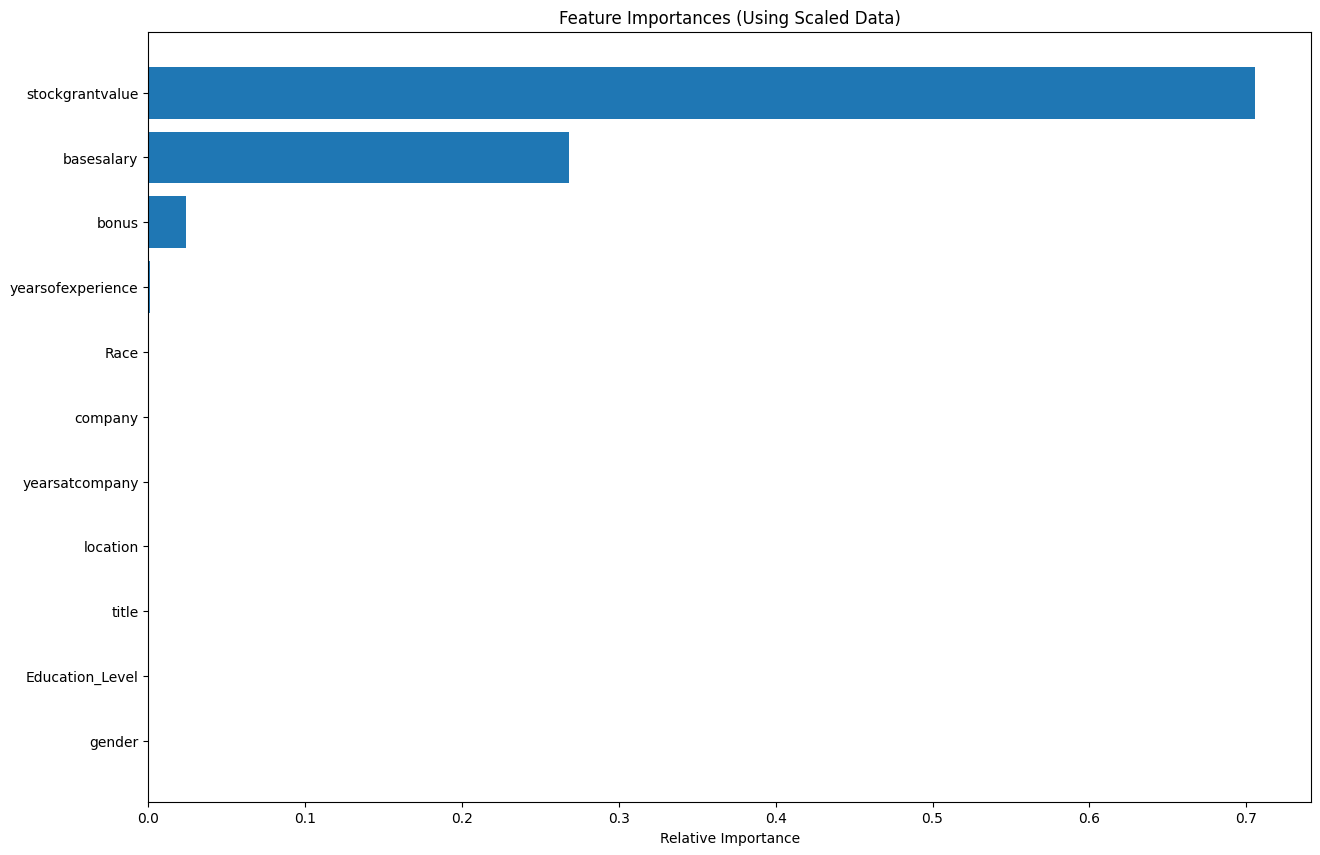

In [122]:
from sklearn.ensemble import RandomForestRegressor
#%%time
df_scaled = X_test_scaled_df
model = RandomForestRegressor(random_state=1, max_depth=5, verbose=3)
model.fit(df_scaled,y)

features = df_scaled.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-25:]  # top 15 features
plt.figure(figsize=(15,10))
plt.title('Feature Importances (Using Scaled Data)')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()